## Command Design pattern
The Command pattern is a behavioral design pattern, in which an abstraction exists between an
object that invokes a command, and the object that performs it.<br>

For example, a button will call the Invoker, that will call a pre-registered Command, that the Receiver will perform.<br>

A Concrete Class will delegate a request to a command object, instead of implementing the request directly.<br>

Using a command design pattern allows you to separate concerns and to solve problems of the
concerns independently of each other. E.g., logging the execution of a command and its outcome.<br>

The command pattern is a good solution for implementing **UNDO/REDO** functionality into your
application.

### USES
-  GUI Buttons, menus
- Macro recording
- Multi-level undo/redo
- Networking - send whole command objects across a network, even as a batch
- Parallel processing or thread pools
- Transactional behavior
- Wizards

### Terminology
- Receiver: The object that will receive and execute the command.
- Invoker: The object that sends the command to the receiver. E.g., A button.
- Command Object: Itself, an object, that implements an execute, or action method, and
contains all required information to execute it.

### UML


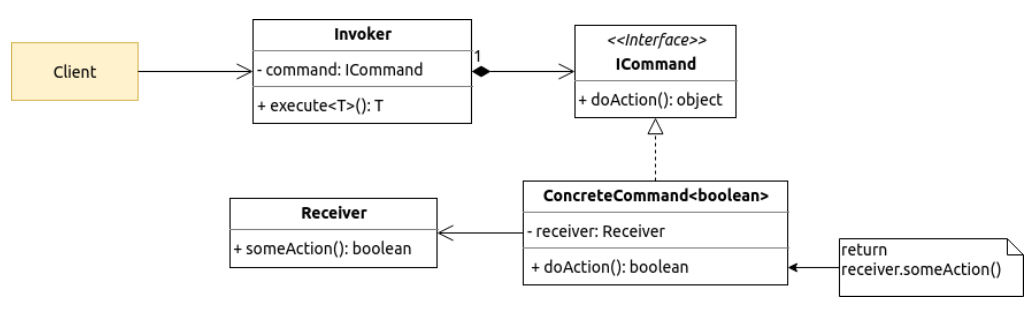

In [1]:
from PIL import Image

Image.open("../command_pattern_uml.png")

### Source code

1. The Client instantiates a Receiver that accepts certain commands that do things.

2. The Client then creates two Command objects that will call one of the specific commands on the
Receiver.

3. The Client then creates an Invoker, E.g., a user interface with buttons, and registers both Commands
into the Invokers dictionary of commands.

4. ***The Client doesn't call the receivers commands directly,*** but the via the Invoker, that then calls the
registered Command objects execute() method.

5. This abstraction between the invoker, command and receiver, allows the Invoker to add extra
functionality such as history, replay, UNDO/REDO, logging, alerting and any other useful things that
may be required.

In [6]:
from abc import ABC, abstractclassmethod

class ICommand(ABC):
    "The command interface, that all commands will implement"
    @staticmethod
    @abstractclassmethod
    def execute():
        "The required execute method that all command objects will use"
        
class Invoker:
    "The Invoker Class"
    def __init__(self):
        self._commands={}
    
    def register(self,command_name:str,command:ICommand):
        "Register commands in the Invoker"
        self._commands[command_name] = command
    
    def execute(self,command_name:str):
        "Execute any registered commands"
        if self._commands.get(command_name):
            self._commands[command_name].execute()
        else:
            print(f"Command [{command_name}] not recognized!")
            
class Receiver:
    "The Receiver"
    
    @staticmethod
    def run_command_1():
        "A set of instructions to run"
        print("Executing command 1")
    
    @staticmethod
    def run_command_2():
        "A set of instructions to run"
        print("Executing Command 2")

class Command1(ICommand):
    """A Command object, that implements the ICommand interface and
    runs the command on the designated receiver"""
    def __init__(self,receiver: Receiver):
        self._receiver = receiver
        
    def execute(self):
        self._receiver.run_command_1() #1
        
class Command2(ICommand):
    """A Command object, that implements the ICommand interface and
    runs the command on the designated receiver"""
    def __init__(self,receiver: Receiver):
        self._receiver = receiver
        
    def execute(self):
        self._receiver.run_command_2()
        
        



In [10]:
#The client
#1. Create a receiver (or the executor)
RECEIVER = Receiver()

#2. Create command(which dictates what the execute does)
COMMAND1= Command1(RECEIVER)
COMMAND2= Command2(RECEIVER)

#3 Register the commands with the invoker
INVOKER = Invoker()
INVOKER.register("1",COMMAND1)
INVOKER.register("2",COMMAND2)

INVOKER.execute("1")
INVOKER.execute("2")
INVOKER.execute("1")
INVOKER.execute("2")

Executing command 1
Executing Command 2
Executing command 1
Executing Command 2


### Command Use Case

- This will be a smart light switch.

- This light switch will keep a history of each time one of its commands was called.

- And it can replay its commands.

- A smart light switch could be extended in the future to be called remotely or automated depending
on sensors.

#### UML

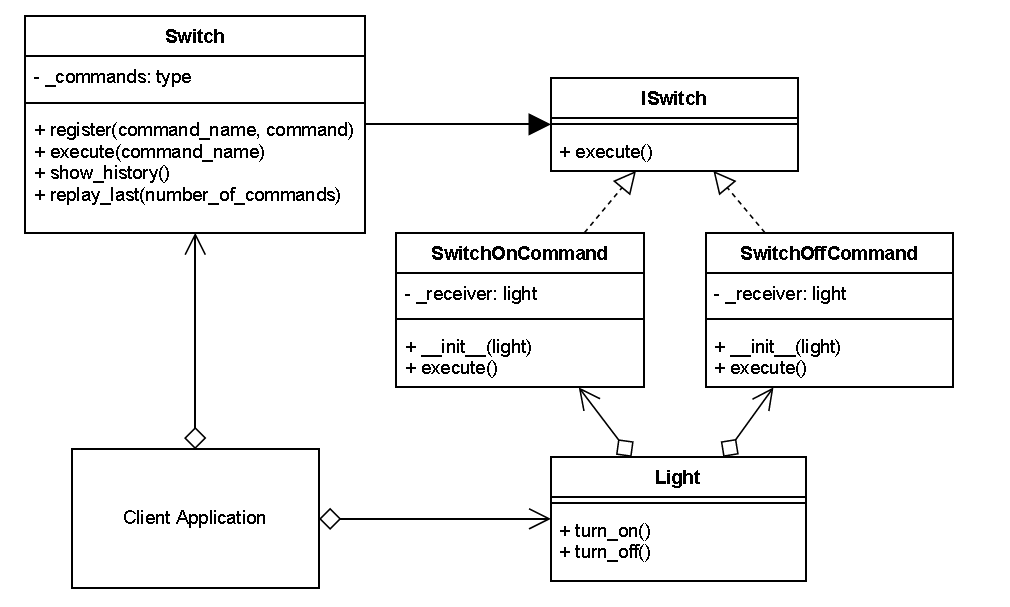

In [11]:
Image.open("../command_use_case_smart_switch.png")

In [12]:
class Light:
    "The receiver"
    
    @staticmethod
    def turn_on():
        print("Light turned ON")
        
    @staticmethod
    def turn_off():
        print("Light turned off")
        
        
#Interface for switch
from abc import ABC, abstractclassmethod

class ISwitch(ABC):
    "The switch interface, that all commands will implement"
    
    @staticmethod
    @abstractclassmethod
    def execute():
        "The required execute method that all command objects will use"

#Concrete switch classes
class SwitchOnCommand(ISwitch):
    "Switch on command"
    def __init__(self,light:Light):
        self._light= light
    
    def execute(self):
        self._light.turn_on()

class SwitchOffCommand(ISwitch):
    "Switch off command"
    def __init__(self,light:Light):
        self._light= light
    
    def execute(self):
        self._light.turn_off()
            

#Invoker class - Switch
from datetime import datetime
import time
class Switch:
    "The Invoker class."
    
    def __init__(self):
        self._commands={}
        self._history=[]
    
    def show_history(self):
        "Print the history of each time a command was invoked"
        for row in self._history:
            print(
                f"{datetime.fromtimestamp(row[0]).strftime('%H: %M: %S')}"
                f" : {row[1]}"
            )
    
    def register(self,command_name:str,command:ISwitch):
        "Register commands in the Invoker"
        self._commands[command_name] = command
    
    def execute(self,command_name:str):
        if self._commands.get(command_name):
            self._commands[command_name].execute()
            self._history.append((time.time(),command_name)) #tuple
        else:
            print(f"Command [{command_name}] not recognized")
    
    def replay_last(self,number_of_commands):
        "Replay the last N commands"
        commands = self._history[-number_of_commands:]
        for command in commands:
            self._commands[command[1]].execute()
            #If you want to record these replays too in history,
            #self.execute(command[1])

In [13]:
#client

LIGHT= Light()
SWITCH_ON=SwitchOnCommand(LIGHT)
SWITCH_OFF=SwitchOffCommand(LIGHT)

SWITCH = Switch()
SWITCH.register("ON",SWITCH_ON)
SWITCH.register("OFF",SWITCH_OFF)

SWITCH.execute("ON")
SWITCH.execute("OFF")
SWITCH.execute("ON")
SWITCH.execute("OFF")

Light turned ON
Light turned off
Light turned ON
Light turned off


In [14]:
# show history
SWITCH.show_history()

13: 30: 43 : ON
13: 30: 43 : OFF
13: 30: 43 : ON
13: 30: 43 : OFF


In [16]:
SWITCH.replay_last(2)

Light turned ON
Light turned off
